<a href="https://colab.research.google.com/github/iatharva25/ml-practicals/blob/main/ML_Exp_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.simplefilter("ignore")

### i) Exploratory Data Analysis

In [ ]:
# Loading dataset or dataframe
segment=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
# Looking for shape of dataframe
segment.shape

(200, 5)

In [ ]:
# Viewing columns
segment.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Head of the dataframe
segment.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Tail of the dataframe

segment.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
# Datatypes involved..
segment.dtypes.value_counts()

,count
int64,4
object,1


In [ ]:
# Information about Dataframe
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Removing white spaces and remaining columns
segment.columns=segment.columns.str.replace(" ","")
segment.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome(k$)',
       'SpendingScore(1-100)'],
      dtype='object')

In [ ]:
# renaming columns
segment.columns=segment.rename(columns={'AnnualIncome(k$)':'AnnualIncome',
                                  'SpendingScore(1-100)':'SpendingScore',"Genre":"Gender"}).columns
segment.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [ ]:
# Viewing int columns
int_col=segment.select_dtypes(include="int64").columns.tolist()
int_col

['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']

In [ ]:
# Viewing categorical columns
cat_col=segment.select_dtypes(include="O").columns.tolist()
cat_col

['Gender']

In [ ]:
# Drop the id column
copy_segment=segment.copy()
segment.drop("CustomerID",axis=1,inplace=True)

In [ ]:
# Summary statistics
segment.describe()

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Text(0, 0.5, 'Count')

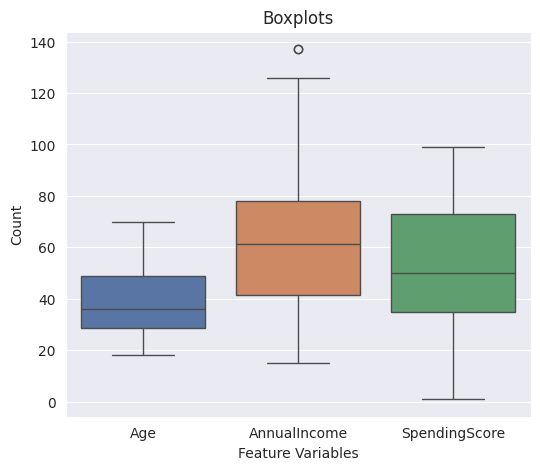

In [ ]:
# looking for outliers through boxplot
sb.set({"figure.figsize":(6,5)})
sb.boxplot(segment)
pt.title("Boxplots")
pt.xlabel("Feature Variables")
pt.ylabel("Count")


since,we have one outlier in annual income,we neglet it as it may be the person with higher annual income.

Text(0, 0.5, 'Count')

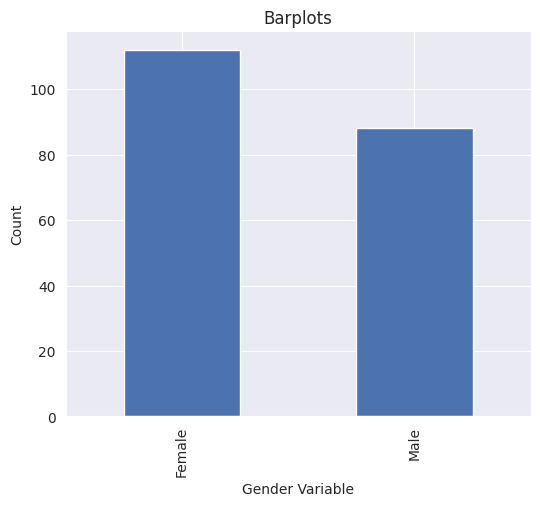

In [ ]:
# Plotting gender for count
segment.Gender.value_counts().plot(kind="bar")
pt.title("Barplots")
pt.xlabel("Gender Variable")
pt.ylabel("Count")


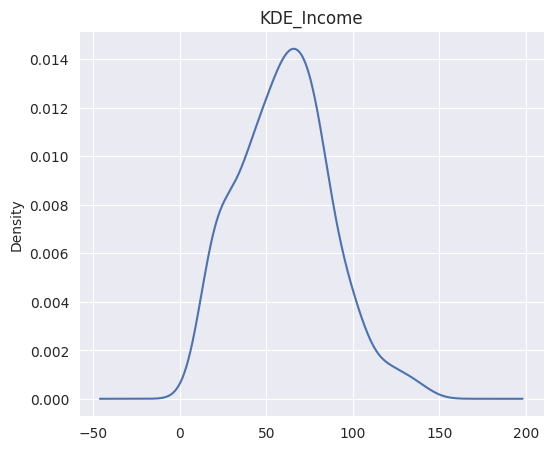

In [ ]:
# KDE plot for Annual income
segment.AnnualIncome.plot(kind="kde")
pt.title('KDE_Income')
pt.show()

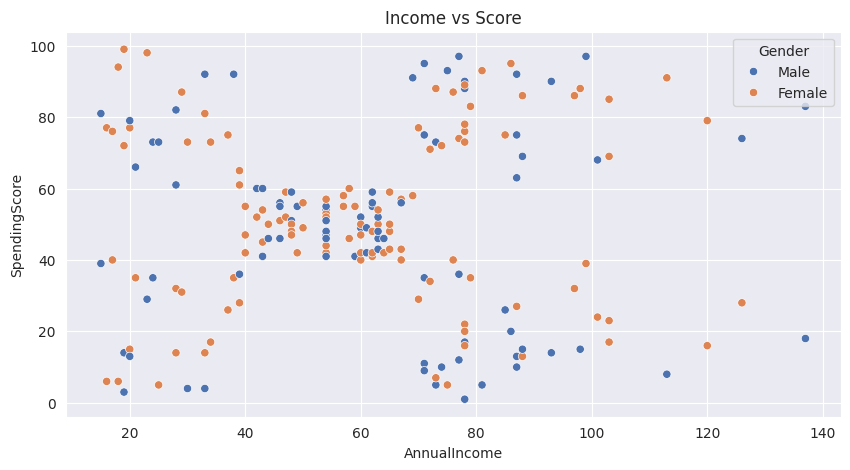

In [ ]:
# Scatter plot for the AnnualIncome & SpendingScore
sb.set({"figure.figsize":(10,5)})
sb.scatterplot(data=segment,x='AnnualIncome',y='SpendingScore',hue="Gender")
pt.title('Income vs Score')
pt.show()

~: We can see that most of the customer data points lies at annual income(40-70) and spending score (40-60).

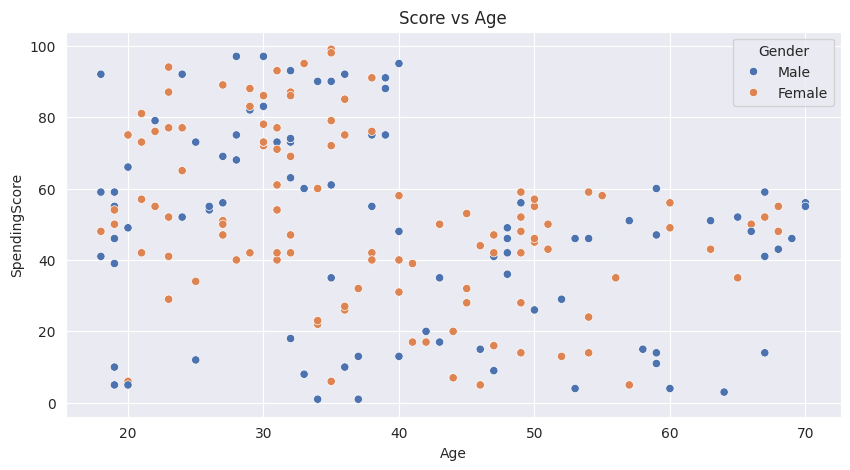

In [ ]:
# Scatter plot for the Age & SpendingScore
sb.scatterplot(data=segment,x='Age',y='SpendingScore',hue="Gender")
pt.title('Score vs Age')
pt.show()

~: We interpret that the age (40-60) of having spending score around (20-60),the age (20-40) of having
higher spending score around (40-100) and the age (60-70) of having balanced spending score around (40-60) respectively .

### ii) Data Preprocessing

In [ ]:
#converting gender to binary
segment.Gender=np.where(segment["Gender"]=="Male",1,0)
segment.Gender

,Gender
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [ ]:
segment.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
# Scaling desired columns for modelling
scaler=StandardScaler()
scaled_val=scaler.fit_transform(segment[["AnnualIncome","SpendingScore"]])

In [ ]:
scaled_val[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [ ]:
# Creating a new dataframe with out Gender variable
features=pd.DataFrame(scaled_val,columns=segment.columns[2:4].tolist())
features

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


### iii)  Model Building & Evaluation

~: DBSCAN groups observations into clusters of high density ,which does not make use of k-clusters.

In [ ]:
#DBSCAN Algo...
# eps is maximum distance b/w datapoints , min_samples for core datapoints.
dbscan=DBSCAN(eps=0.5,min_samples=10,metric="euclidean")
dbscan.fit(features)
ypre=dbscan.fit_predict(features)

In [ ]:
dbscan

DBSCAN(min_samples=10)

In [ ]:
ypre

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2,  3,
       -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])

~:Outliers are denoted with " -1 "

In [ ]:
dbscan.labels_

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2,  3,
       -1,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])

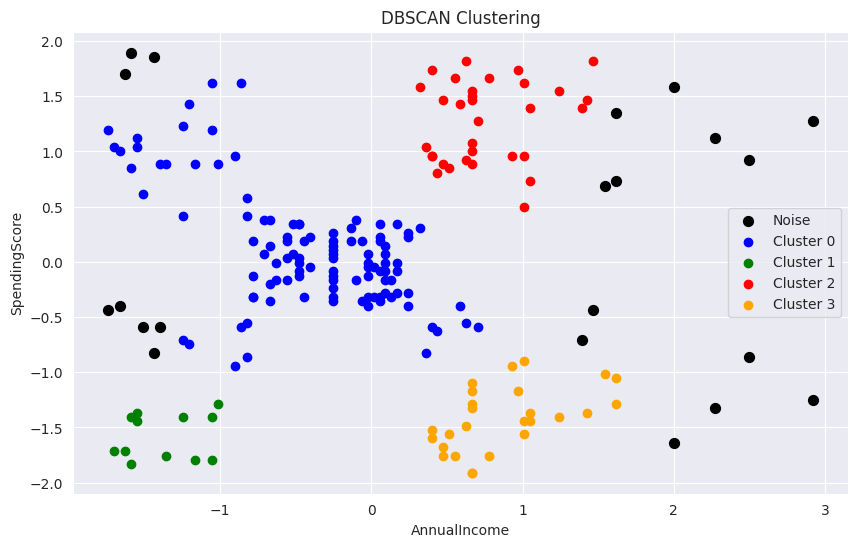

In [ ]:
# Plotting for clusters visualization
clr=["blue","green","red","orange","purple"]

pt.figure(figsize=(10,6))
for i in np.unique(ypre):
    if i==-1:
        pt.scatter(features[ypre== i]['AnnualIncome'],features[ypre== i]['SpendingScore'],s=50,c="black",label="Noise")
    else:
        pt.scatter(features[ypre== i]['AnnualIncome'],features[ypre== i]['SpendingScore'],label=f"Cluster {i}",c=clr[i])

pt.xlabel('AnnualIncome')
pt.ylabel('SpendingScore')
pt.title('DBSCAN Clustering')
pt.legend()
pt.show()

~: It's to be interpreted that black color datapoints represents outliers/noise in the clusters.

In [ ]:
#Evaluation Metrics..
ss=metrics.silhouette_score(features,dbscan.labels_)
print("Silhouette_Score Coefficient : {:.2f}".format(ss))

Silhouette_Score Coefficient : 0.41


~:Silhouette_Score ranges from  -1 to 1,which near to one is best and near to -1 is worst.
    Since we got coffecient as <b><i>0.41</b></i> in which datapoints are very Moderately compact with the clusters.

<center>END